<a href="https://colab.research.google.com/github/KimSiGyum/Python/blob/main/3O4O5_%EA%B9%80%EC%8B%9C%EA%B2%B8_2024_Custom(%ED%95%99%EC%83%9D%EC%9A%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**직접 수집한 이미지 데이터 이용하기**
---
직접 수집한 이미지 파일을 이용해 CNN 모델을 학습시켜보자.

#**✍(실습) 손글씨 인식 모델 만들기**
---
손글씨 사진을 수집하여 손글씨 인식 모델을 만들어보자.

##**0. 데이터 수집하기**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##**1. 데이터 준비하기**

- 학습에 사용할 데이터의 양이 적은 경우 데이터 증강(data augmentation)을 통해 데이터의 양을 늘릴 수 있다.
- 케라스의 ImageDataGenerator 클래스는 이미지 파일을 전처리 또는 증강하여 신경망 학습이 가능한 배열 형태로 변환해주는 클래스이다.

### **1-1. 데이터 생성(증강) 방법 설정**

**ImageDataGenerator**
- 이미지 파일을 신경망 학습이 가능한 배열 형태로 변환해 주는 클래스

><table align="left" border="1">
    <tr align="left">
        <th>매개변수</th>
        <th>디폴트</th>
        <th>설명</th>
    </tr>
    <tr>
        <td>rescale</td>
        <td>None</td>
        <td>값의 범위 스케일링 방법 설정 (정규화)</td>
    </tr>
    <tr>
        <td>rotation_range</td>
        <td>0</td>
        <td>회전 각도 범위 설정 (단위:도)</td>
    </tr>
    <tr>
        <td>width_shift_range</td>
        <td>0.0</td>
        <td>가로 방향 이동 비율 범위 설정</td>
    </tr>
    <tr>
        <td>height_shift_range</td>
        <td>0.0</td>
        <td>세로 방향 이동 비율 범위 설정</td>
    </tr>
    <tr>
        <td>zoom_range</td>
        <td>0.0</td>
        <td>확대 비율 범위 설정</td>
    </tr>
    <tr>
        <td>horizontal_flip</td>
        <td>False</td>
        <td>좌우 반전 설정</td>
    </tr>
    <tr>
        <td>vertical_flip</td>
        <td>False</td>
        <td>상하 반전 설정</td>
    </tr>
    <tr>
        <td>fill_mode</td>
        <td>'nearest'</td>
        <td>새로운 픽셀 채우는 방법 설정 ('nearest' (aaa|abc|ccc) / 'constant' (kkk|abc|kkk) ...)</td>
    </tr>
</table>

In [ ]:
# 모듈 가져오기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# 학습 데이터 생성용 ImageDataGenerator 설정 및 인스턴스 생성
train_datagen = ImageDataGenerator(
    rescale = 1/255, # 정규화 설정
    rotation_range = 20, # 회전 각도 범위 20도
    width_shift_range = 0.2, # 가로 방향 이동 비율 범위 20%
    height_shift_range = 0.2, # 세로 방향 이동 비율 범위 20%
    zoom_range = 0.2, # 확대 비율 범위 20%
    horizontal_flip = False, # flip 속성을 True로 설정하고 결과 확인하기
    vertical_flip = False,
    fill_mode =  'nearest' # 'nearest' #'cosntant' # 두 설정의 결과 확인하여 비교하기
)

In [ ]:
# 테스트 데이터 생성용 ImageDataGenerator 설정 및 인스턴스 생성
test_datagen = ImageDataGenerator(
    rescale = 1/255 # 정규화 설정
)

### **1-2. 데이터 생성기(generator) 초기화 및 생성**

**flow_from_directory()**
- ImageDataGenerator의 메서드
- 디렉터리에서 파일을 읽어 증강된 데이터 배치(batch, 꾸러미)를 생성하고자 할 때 사용
- 실시간으로 데이터 배치를 만들어내는 제너레이터(generator)를 초기화하고 반환함<br>
※ 배치(batch) : 제너레이터가 한 번에 생성하는 데이터의 수량(배치를 크게 설정해도 전체 데이터 수를 넘을 수 없음)

><table align="left" border="1">
    <tr align="left">
        <th>매개변수</th>
        <th>디폴트</th>
        <th>설명</th>
    </tr>
    <tr>
        <td>directory</td>
        <td></td>
        <td>데이터 경로</td>
    </tr>
    <tr>
        <td>target_size</td>
        <td>(256, 256)</td>
        <td>이미지 데이터 사이즈 설정 (사이즈 조정)</td>
    </tr>
    <tr>
        <td>class_mode</td>
        <td>'categorical'</td>
        <td>레이블 타입 설정 ('binary' (0, 1) / 'categorical' (one-hot encoding) / None ...)</td>
    </tr>
    <tr>
        <td>batch_size</td>
        <td>32</td>
        <td>배치 사이즈 설정(데이터의 개수 보다 작게 설정, 2의 제곱 단위)</td>
    </tr>
</table>

In [ ]:
# 제너레이터가 사용할 데이터 경로
train_path = '/content/drive/MyDrive/custom/train'
test_path = '/content/drive/MyDrive/custom/test'
# 제너레이터가 생성할 이미지 사이즈
input_shape = (150, 150, 3) # (24, 24, 3) # 이미지 사이즈를 조절하여 결과를 비교해보기
# 제터레이터가 생성할 레이블 유형
label_type = 'categorical'
# 제너레이터가 한 번에 생성할 이미지 개수
batch_size = 32

In [ ]:
# 학습용 이미지 파일을 읽어 데이터를 생성하는 제너레이터 초기화
train_generator = train_datagen.flow_from_directory(
    directory = train_path,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 105 images belonging to 10 classes.


In [ ]:
# 테스트용 이미지 파일을 읽어 데이터를 생성하는 제너레이터 초기화
test_generator = test_datagen.flow_from_directory(
    directory = test_path,
    target_size = input_shape[:2],
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 25 images belonging to 10 classes.


### **1-3. 데이터 살펴보기**

- 설정을 마친 생성기(generator)는 학습 과정에서 반복(iteration)이 일어날 때 실시간으로 설정된 배치 크기 만큼의 데이터를 생성한다.
- 데이터가 잘 생성되는지, 생성된 데이터는 어떤 형식인지 살펴보자.

In [ ]:
# 생성된 데이터(x_batch)와 레이블(y_batch) 가져오기
x_batch, y_batch = next(train_generator)

In [ ]:
# 생성된 데이터(x) 정보 확인하기
print('생성된 이미지 개수 :', len(x_batch))
print('이미지의 타입 :', type(x_batch))
print('이미지의 형태 :', x_batch.shape)

생성된 이미지 개수 : 32
이미지의 타입 : <class 'numpy.ndarray'>
이미지의 형태 : (32, 150, 150, 3)


In [ ]:
# 생성된 레이블(y) 정보 확인하기
print('생성된 레이블 개수 :', len(y_batch))
print('레이블의 타입 :', type(y_batch))
print('레이블의 형태 :', y_batch.shape)

생성된 레이블 개수 : 32
레이블의 타입 : <class 'numpy.ndarray'>
레이블의 형태 : (32, 10)


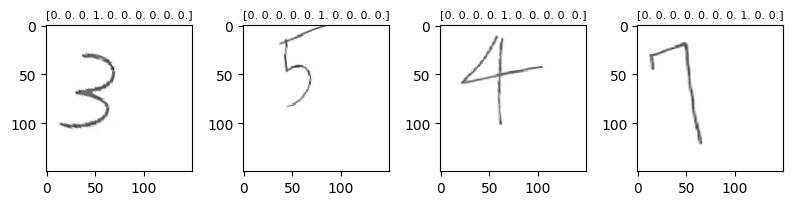

In [ ]:
# 생성된 데이터 이미지 형태로 출력하기
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))

for i in range(4):
    plt.subplot(1, 5, i+1) #plt.subplot(1, 5, i+1)
    plt.imshow((x_batch[i] * 255).astype('uint8'))
    plt.title(str(y_batch[i]), fontsize = 8)
    #plt.axis('off')

plt.tight_layout()
plt.show()

##**2. 모델 학습시키기**

### **2-1. 신경망 모델(CNN) 생성**

아래와 같은 구조의 신경망 모델을 생성해보자.
<table align="left" border="1">
    <tr align="left">
        <th>층</th>
        <th>설정</th>
    </tr>
    <tr>
        <td>입력층</td>
        <td></td>
    </tr>
    <tr>
        <td>합성곱층</td>
        <td>필터수 32개, 커널크기 3X3, 스트라이드 1씩, 패딩 적용, 활성화 함수 ReLU 이용</td>
    </tr>
    <tr>
        <td>풀링층</td>
        <td>맥스풀링, 풀링크기 2X2</td>
    </tr>
    <tr>
        <td>합성곱층</td>
        <td>필터수 64개, 커널크기 3X3, 스트라이드 1씩, 패딩 적용, 활성화 함수 ReLU 이용</td>
    </tr>
    <tr>
        <td>풀링층</td>
        <td>맥스풀링, 풀링크기 2X2</td>
    </tr>
    <tr>
        <td>합성곱층</td>
        <td>필터수 128개, 커널크기 3X3, 스트라이드 1씩, 패딩 적용, 활성화 함수 ReLU 이용</td>
    </tr>
    <tr>
        <td>풀링층</td>
        <td>맥스풀링, 풀링크기 2X2</td>
    </tr>
    <tr>
        <td>완전연결층(은닉층)</td>
        <td>노드수 128개, 활성화 함수 ReLU 이용</td>
    </tr>
    <tr>
        <td>완전연결층(출력층)</td>
        <td>노드수 ( ??? )개, 활성화 함수 ( ??? ) 이용</td>
    </tr>
</table>


In [ ]:
# 모듈 가져오기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input

In [ ]:
# 모델 생성 및 층 구성하기
model = Sequential()
model.add(Input(shape=(150, 150, 3)))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# 모델 구조 확인하기
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,403,082 (20.61 MB)

 Trainable params: 5,403,082 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

### **2-2. 학습 방법 설정**

아래과 같이 학습 방법을 설정하자.
<table align="left" border="1">
    <tr align="left">
        <th>속성</th>
        <th>설정 값</th>
    </tr>
    <tr>
        <td>손실함수(loss)</td>
        <td>범주형 교차 엔트로피('categorical_crossentropy')</td>
    </tr>
    <tr>
        <td>최적화 알고리즘(optimizer)</td>
        <td>아담('adam')</td>
    </tr>
    <tr>
        <td>성능평가 지표(metrics)</td>
        <td>정확도('accuracy')</td>
    </tr>
</table>


In [ ]:
# 학습 방법 설정하기
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

### **2-3. 모델 학습시키기**


X, y 데이터 대신 제너레이터를 이용해 모델을 학습시킬 때는 steps_per_epoch 값을 설정한다.
- steps_per_epoch : 학습 1회(에포크) 당 데이터 배치(batch)를 생성하는 횟수 <br> (Ex. 제너레이터의 배치 사이즈가 32일 때, 학습 1회 당 입력되는 데이터 수는 32 * steps_per_epoch이다.)

In [ ]:
# 모델 학습시키기
model.fit(
    train_generator,
    steps_per_epoch = 4, # len(train_generator)
    epochs = 100,

)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.0972 - loss: 7.1313
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0920 - loss: 3.5461
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0868 - loss: 2.5606
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1045 - loss: 2.5797
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0523 - loss: 2.4057
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.1201 - loss: 2.4405
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.0638 - loss: 2.4603
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

##**3. 모델 평가하기**

테스트 제너레이터를 이용해 모델의 성능을 평가해보자.

In [ ]:
# 테스트 손실과 테스트 정확도 구하기
test_loss, test_accuracy = model.evaluate(
    test_generator,
    verbose = 0
)
print('테스트 손실 :', test_loss, '테스트 정확도 :', test_accuracy)

테스트 손실 : 2.3405280113220215 테스트 정확도 : 0.07999999821186066


##**4. 모델 활용하기**

data/predict/new 폴더에 내가 새로 쓴 숫자 이미지를 넣고 아래 코드를 실행해보자.

In [ ]:
import numpy as np

# 이미지를 배열 형태로 변환하기 위한 제너레이터 초기화
predict_generator = test_datagen.flow_from_directory(
    directory = '/content/drive/MyDrive/custom/predict',
    target_size=input_shape[:2],
    batch_size = batch_size,
    class_mode = None,
    shuffle = False
)

# 제너레이터를 이용한 모델의 예측 수행
predictions = model.predict(predict_generator, steps=len(predict_generator))
predicted_classes = np.argmax(predictions, axis=1)
class_labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
predicted_class_labels = [class_labels[idx] for idx in predicted_classes]
for i, label in enumerate(predicted_class_labels):
    print(f"Image {i+1}: Predicted class: {label}")

Found 2 images belonging to 1 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 775ms/step
Image 1: Predicted class: eight
Image 2: Predicted class: seven


##**5. 모델 배포하기**

학습을 완료하고 충분한 성능이 검증된 모델을 h5 또는 keras 파일로 저장(save)하고 다른 애플리케이션에서 이를 가져와(load) 활용할 수 있다.

In [ ]:
# 모델 저장하기
model.save('my_model.keras')

In [ ]:
# 모델 가져오기
from keras.models import load_model
loaded_model = load_model('my_model.keras')
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 41472)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,308,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,403,084 (20.61 MB)

 Trainable params: 5,403,082 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)